# Recurrent Nerual Network

## Data Preprocessing

### Importing libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Import the training set

In [7]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))

training_set_scaled = sc.fit_transform(training_set)

### Creating data structure

In [10]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

### Reshaping

In [11]:
X_train = np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1], 1))

## Building the RNN

### Import keras libs

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initializing the RNN

In [15]:
regressor = Sequential()

### Adding the first LSTM layer

In [16]:
regressor.add(LSTM(
    units=50,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1)
    )
)

# Dropout regularisation
regressor.add(Dropout(
    rate=0.2
    )
)

### Adding extra LSTM layers

#### 2nd Layer

In [17]:
regressor.add(LSTM(
    units=50,
    return_sequences=True
    )
)

# Dropout regularisation
regressor.add(Dropout(
    rate=0.2
    )
)

#### 3rd Layer

In [18]:
regressor.add(LSTM(
    units=50,
    return_sequences=True
    )
)

# Dropout regularisation
regressor.add(Dropout(
    rate=0.2
    )
)

#### 4th Layer

In [19]:
regressor.add(LSTM(
    units=50,
    return_sequences=False   # Last layer
    )
)

# Dropout regularisation
regressor.add(Dropout(
    rate=0.2
    )
)

### Output Layer

In [20]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [21]:
regressor.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

### Fitting the RNN to the Training set

In [22]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 20s 142ms/step - loss: 0.0403
Epoch 2/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 6s 145ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 9s 252ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 8s 196ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 6s 158ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 6s 147ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0046
Epoch 13/100

## Predictions and result visualization

### Real stock price

In [23]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Predicted stock price

In [26]:
dataset_total = pd.concat(
    (dataset_train['Open'], dataset_test['Open']),
    axis=0
)

inputs = dataset_total[len(dataset_total)-len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)

# Scale inputs
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


predicted_stock_price = regressor.predict(X_test)

# Inverse scaling
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [27]:
print(predicted_stock_price)

[[787.8202 ]
 [785.03326]
 [785.6338 ]
 [787.0714 ]
 [790.4713 ]
 [796.52783]
 [801.8289 ]
 [803.81903]
 [804.3209 ]
 [804.4449 ]
 [804.4834 ]
 [804.28754]
 [804.0203 ]
 [804.46265]
 [805.2831 ]
 [810.15546]
 [817.1501 ]
 [824.45905]
 [828.13824]
 [823.4442 ]]


### Visualizing the results

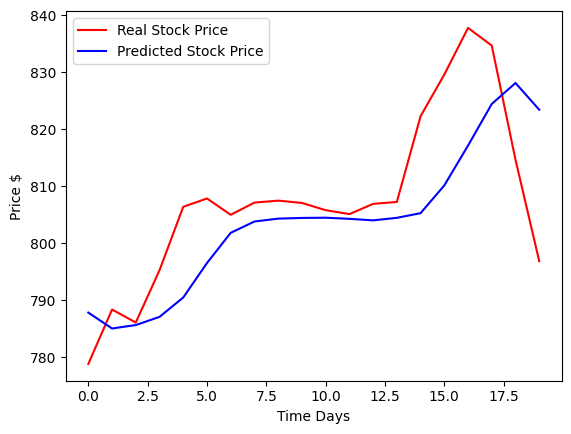

In [30]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.xlabel('Time Days')
plt.ylabel('Price $')
plt.legend()
plt.show()
